In [1]:
import torch
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torchvision.models import ResNet34_Weights
import numpy as np
import torchvision.transforms as transforms        
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter, raps_imagenet_real_scatter, saps_imagenet_real_scatter

#  Preprocess
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# load pre-trained model 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet34(weights=ResNet34_Weights.IMAGENET1K_V1).to(device)


# Temperature Scaling
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=2)
model = ModelWithTemperature(model, temperature = 1.2).to(device)
model.set_temperature(train_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.05

Before temperature - NLL: 1.106, ECE: 0.025
Optimal temperature: 1.119
After temperature - NLL: 1.116, ECE: 0.037


APS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9548 ± 0.0010
Final Average Prediction Set Size: 29.16 ± 0.64
Final Average Coverage: 0.9496 ± 0.0013
Final Average Real Probability: 0.8972 ± 0.0018


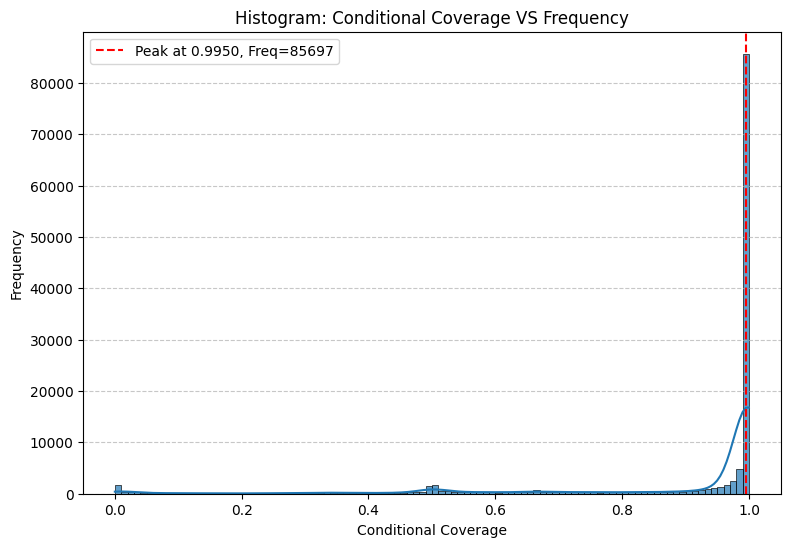

85697 (68.91%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.4221 ± 0.0622
Final Average Prediction Set Size: 10.98 ± 0.37
Final Average Coverage: 0.9496 ± 0.0019
Final Average Real Probability: 0.8732 ± 0.0039


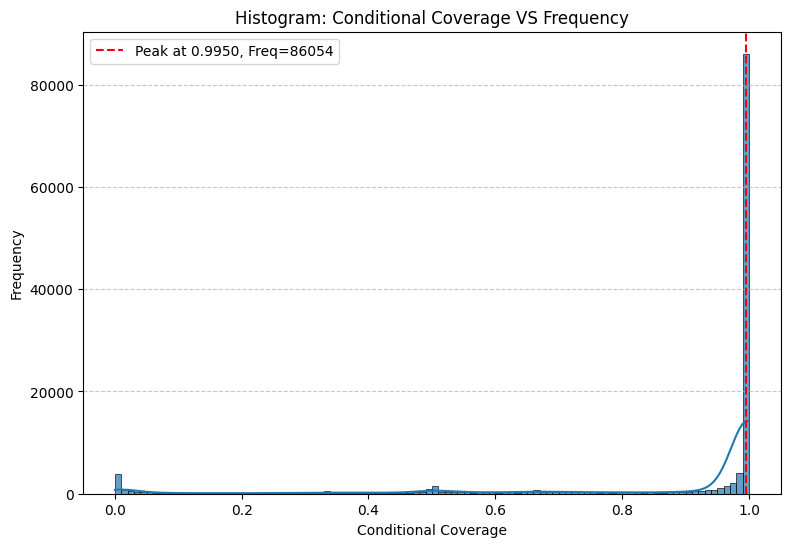

86054 (69.20%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.2, k_reg=9, num_runs=10, alpha=0.05, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0494 ± 0.0085
Final Average Prediction Set Size: 7.46 ± 0.16
Final Average Coverage: 0.9496 ± 0.0017
Final Average Real Probability: 0.8741 ± 0.0035


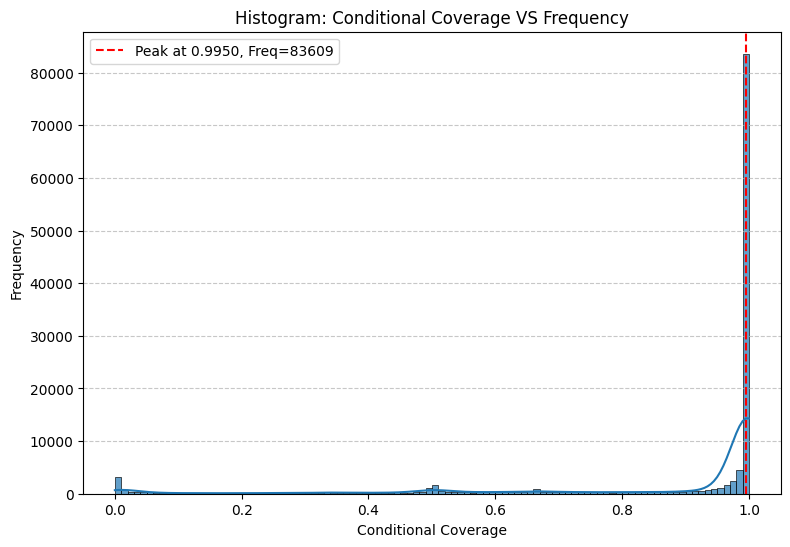

83609 (67.23%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.05, num_runs=10, alpha=0.05, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9549 ± 0.0011
Final Average Prediction Set Size: 29.98 ± 0.70
Final Average Coverage: 0.9496 ± 0.0014
Final Average Real Probability: 0.8976 ± 0.0022


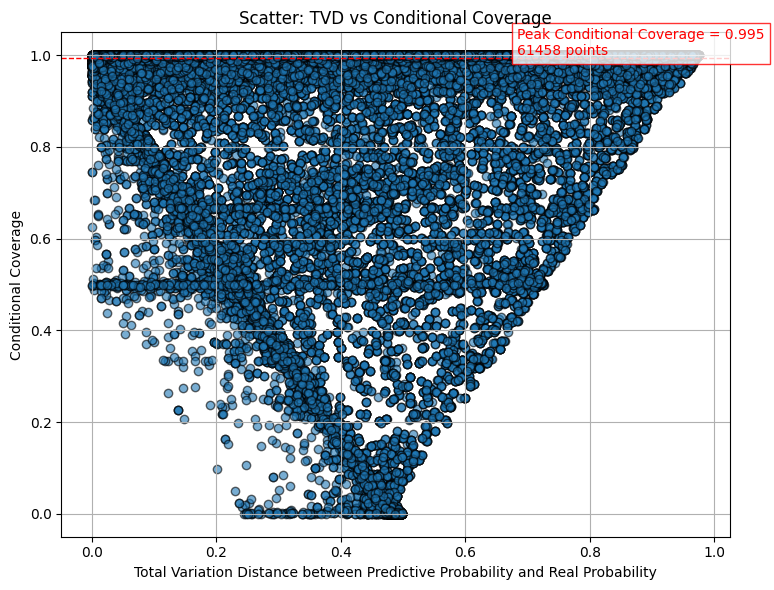

Peak Conditional Coverage = 0.995, with 61458 samples

=== Count Regions Summary ===
40990 (33.0%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
39357 (31.6%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
21226 (17.1%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.97724']
  Real Probability Set      : ['0.98826']
Sample 2:
  Predictive Probability Set: ['0.96272']
  Real Probability Set      : ['0.99752']
Sample 3:
  Predictive Probability Set: ['0.87133']
  Real Probability Set      : ['0.86290']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.38385', '0.23987', '0.23784', '0.08250']
  Real Probability Set      : ['0.00009', '0.00120', '0.00344', '0.03098']
Sample 2:
  Predictive Probability Set: ['0.23880', '0.07395', '0.06094', '0.04866', '0.03864', '0.03684', '0.03146', '0.03082', '0.02462', '0.02399', '0.02285', '

In [2]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.3782 ± 0.0751
Final Average Prediction Set Size: 10.68 ± 0.38
Final Average Coverage: 0.9492 ± 0.0019
Final Average Real Probability: 0.8712 ± 0.0040


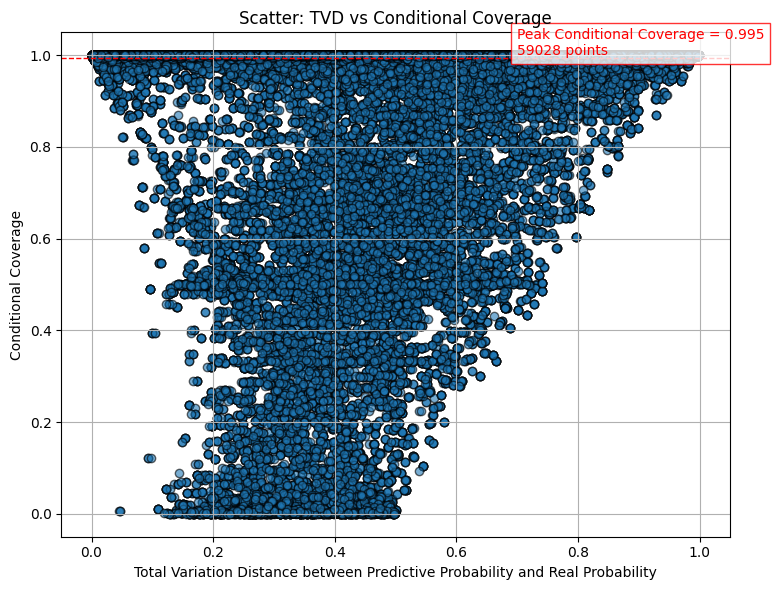

Peak Conditional Coverage = 0.995, with 59028 samples

=== Count Regions Summary ===
40123 (32.3%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
35464 (28.5%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
24686 (19.9%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.97956', '0.01991', '0.00036', '0.00006', '0.00004', '0.00002', '0.00002', '0.00001', '0.00001', '0.00001']
  Real Probability Set      : ['0.99899', '0.00050', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00050', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.99829', '0.00102', '0.00026', '0.00013', '0.00004', '0.00004', '0.00003', '0.00003', '0.00002', '0.00002', '0.00002']
  Real Probability Set      : ['0.99943', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000']
Sample 3:
  Predictive Probability Set: [

In [3]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.2, k_reg=9, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0418 ± 0.0080
Final Average Prediction Set Size: 7.31 ± 0.15
Final Average Coverage: 0.9495 ± 0.0016
Final Average Real Probability: 0.8719 ± 0.0032


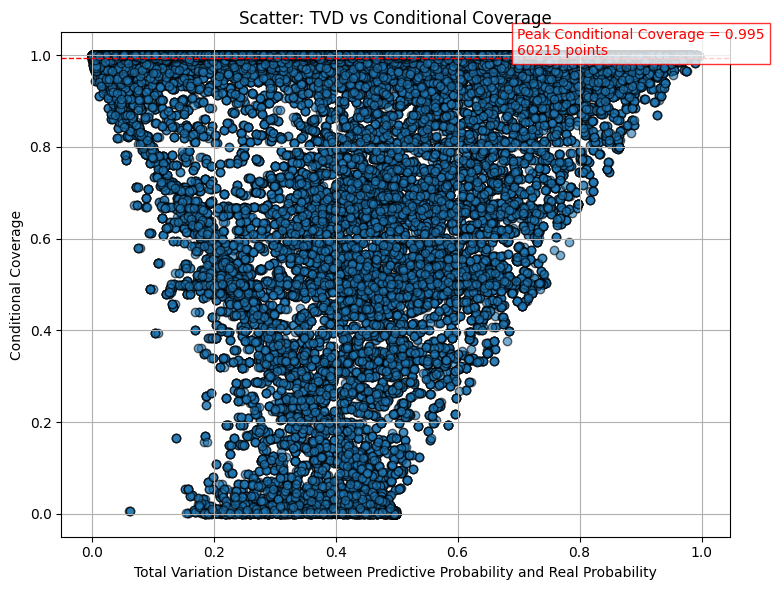

Peak Conditional Coverage = 0.995, with 60215 samples

=== Count Regions Summary ===
42077 (33.8%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
36821 (29.6%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
25164 (20.2%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.88446', '0.02581', '0.01622', '0.00966']
  Real Probability Set      : ['0.99487', '0.00128', '0.00000', '0.00128']
Sample 2:
  Predictive Probability Set: ['0.89977', '0.04657', '0.00957', '0.00648']
  Real Probability Set      : ['0.99432', '0.00364', '0.00051', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.95635', '0.00744', '0.00589']
  Real Probability Set      : ['0.90649', '0.00036', '0.00036']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.40887', '0.12357', '0.09117', '0.05150', '0.03558', '0.03035', '0.02466', '0.02117', '0.01900', '0.0141

In [4]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.05, num_runs=10, alpha=0.05)